# Dictionary:

In [1]:
import pickle
dict = pickle.load(open("defaulmodel/defaultdict.de","rb"))

In [2]:
dict[42]

'jeans'

In [3]:


dict["in"]

28

# Netwerkgrafik:

In [4]:
import mxnet as mx
mod = mx.mod.Module.load("defaulmodel/defaulttrainednn", 10, False, data_names=['train_source_window','train_target_window'],label_names=['softmax_label'])

In [5]:
digraph = mx.viz.plot_network(mod.symbol, save_format= 'png')

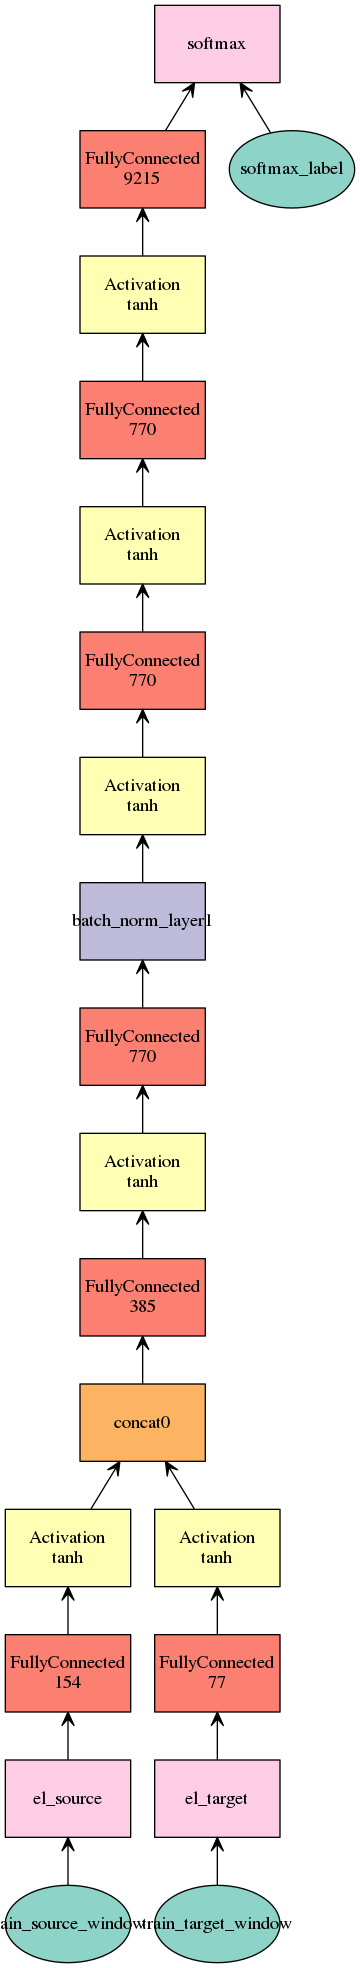

In [6]:
digraph.render()

from IPython.display import Image
Image("plot.gv.png")

# Man kann sich auch einen Satz übersetzen lassen:

In [7]:
import uebersetzung
import bpe
dictforeign = pickle.load(open("defaulmodel/defaultdict.en","rb"))
ref = "ein kleiner mann und ein großer junge .\n"

In [8]:
line = bpe.apply([ref], False, "defaulmodel/a1trained7k.deen")
line

'ein kleiner mann und ein großer junge .\n '

In [9]:
refstrlist = line.split()
refstrlist

['ein', 'kleiner', 'mann', 'und', 'ein', 'großer', 'junge', '.']

In [10]:
refindlist = []
for word in refstrlist:
    refindlist.append(dict[word])
refindlist

[3, 312, 23, 30, 3, 2694, 117, 13]

In [11]:
refindlist.append(2)
output = uebersetzung.uebersetzen(2,5,10,"defaulmodel/defaulttrainednn",refindlist)
output

[[3, 4.0, 29.0, 36.0, 3.0, 339.0, 124.0, 17.0, 2.0],
 [3, 285.0, 29.0, 36.0, 3.0, 93.0, 124.0, 17.0, 2.0],
 [3, 132.0, 29.0, 36.0, 3.0, 93.0, 124.0, 17.0, 2.0],
 [3, 4.0, 29.0, 36.0, 3.0, 161.0, 277.0, 17.0, 2.0],
 [3, 4.0, 29.0, 36.0, 3.0, 93.0, 124.0, 17.0, 2.0]]

In [12]:
translated = []
for case in output:
    case = [ind for ind in case if ind!=1 and ind!=2]
    transstr = []
    for ind in case:
        transstr.append(dictforeign[ind])
    translated.append(" ".join(transstr))
for line in translated:
    print (line)

a small man and a brown boy .
a little man and a large boy .
a young man and a large boy .
a small man and a green building .
a small man and a large boy .


[Mxnet Beispiele](http://github.com/dmlc/mxnet-notebooks/blob/master/python/how_to/predict.ipynb)

[Hier gibt es ausführliche Beispiele](http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)